Seaborn is a statistical plotting library. It is built on top of matplotlib. It has really good default styles and is also designed to work well with pandas dataframe objects. You can visit https://seaborn.pydata.org/api.html to see all the different methods and all. The code is also open sourced on github so you can view code there as well

## Distribution Plots

These are plots that help measure the distribution of a dataset. 

In [1]:
#It is convention to import it as sns
import seaborn as sns

In [2]:
#To see all the plots without doing extra work
%matplotlib inline

Seaborn comes in with some built in data sets to help you get a grasp of the functionality before switching to your own data sets. To use them you use:
1. sns.load_dataset(name,...) => will return a pandas dataframe containing data from the name dataset that seaborn has. To find all possible valid names you can pass in just use:
    - sns.get_dataset_names() => will return list of possible dataset names

In [3]:
#sns.get_dataset_names()

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


We now look at our first plot, the distplot. It allows us to see the distribution of a univariate set of observations. Univariate just means one variable. Essentially it generates a histogram and a kde(kernel density estimation) This will xplored in more depth later in this section. We use:
1. sns.distplot(Ser, kde=True,bins=n...) => Creates a distplot of the Series object that is passed in. Will not show kde only if False arguement is passed into kde. bins argument can be specified to decide how many intervals the histogram should have, the higher it is the more specific you get. But you don't want to go too high or else you won't gain anything from the plot

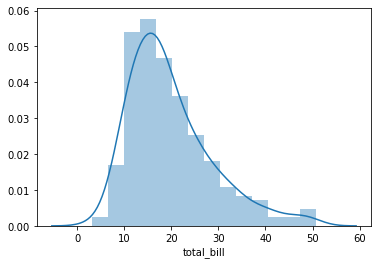

In [6]:
sns.distplot(tips['total_bill'])

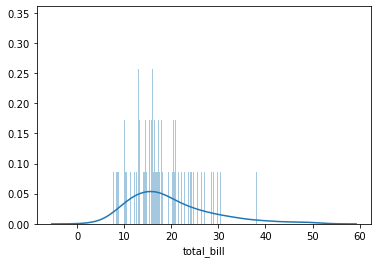

In [7]:
sns.distplot(tips['total_bill'], bins=1000)

Now we look at jointplots. This type of plot allows you to match up to bivariate sets of data through dist plots. You will use:
1. sns.jointplot(x,y,data=None,kind=None,...) => Will create jointplot based on what you pass in. Either you pass in Series for x and y or you pass in a dataframe for data and then make the x and y the column or row names. You can set kind to any of the following arguments: { “scatter” | “reg” | “resid” | “kde” | “hex” }. It changes how the data inside is shown 

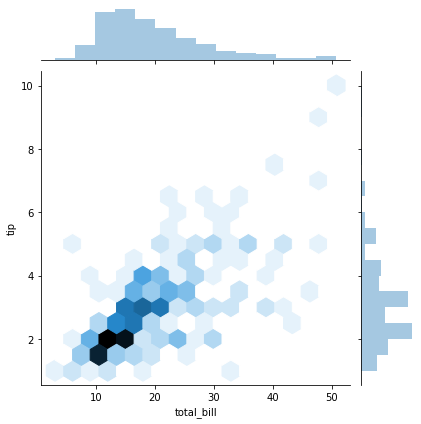

In [8]:
sns.jointplot(x='total_bill', y = 'tip', data = tips, kind = 'hex')

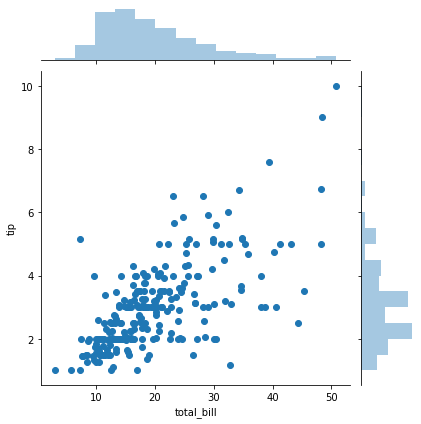

In [9]:
sns.jointplot(tips['total_bill'], tips['tip'])

Next we see pairplot. It will create jointplots and distplots for every possible combination of columns in your dataframe that is numerical. You will use: 
1. sns.pairplot(df, hue=None, palette=None,...) => will create a pairplot using the args. df takes in a dataframe. hue is a way to add in categorical info. You just pass in the column name for this. palette lets you control the color scheme for hue


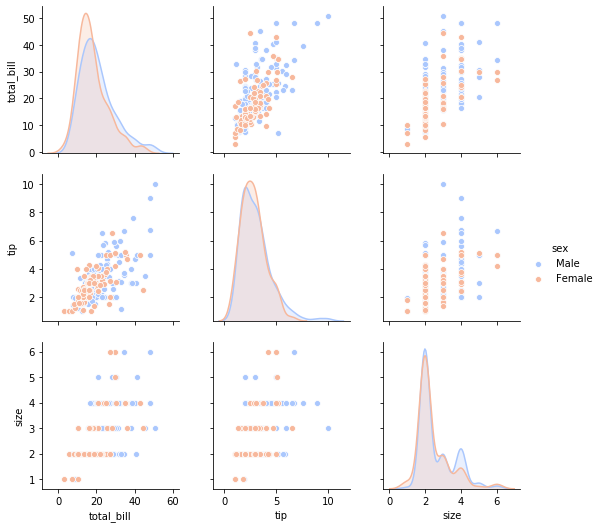

In [10]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

Now we look at rugplots. They are just plots that are univariate and how they work is that they place a tick wherever a datapoint is shown. To create one you use:
1. sns.rugplot(d) => Will create rugplot using the data you pass in as d

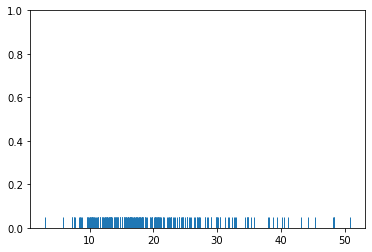

In [11]:
sns.rugplot(tips['total_bill'])

Now we talk a little concepts here. Histograms basically just count how many of those ticks are inside an interval and then make the bars accordingly. To generate a kde what needs to be done is that a gaussian curve or normal distribution is centered over each tick of the rugplot and then all those curves get added together to make the kde. Here is some code that demonstrates that

(0, 1)

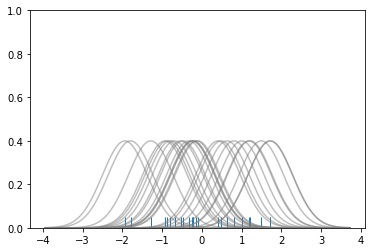

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25)

sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)


bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

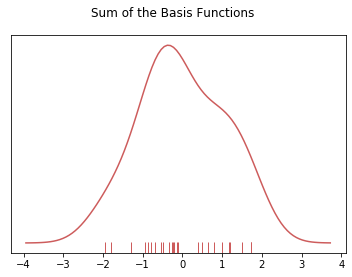

In [13]:
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset,c = 'indianred')
plt.yticks([])
plt.suptitle("Sum of the Basis Functions")

## Categorical Plots

These are plots that help measure categorical data

First we look at barplots. They basically create bar graphs of categorical sections by performing aggregate functions on data in the groups. You will use:
1. sns.barplot(x,y,data=None,estimator=None...) => Creates barplot using parameters. Same deal with x,y and data. estimator is some sort of function to estimate within each categorical bin.

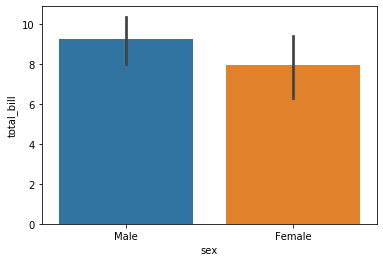

In [14]:
import numpy as np
sns.barplot(x='sex',y='total_bill', data=tips, estimator=np.std)

Next we look at countplot. It does the same thing as above but but instead of perform some aggregate function it just counts the number of occurances of each thing. You use:
1. sns.countplot(x,data=None,...) => Creates countplot with parameters. Same deal for x and data as above however no y argument should be passed

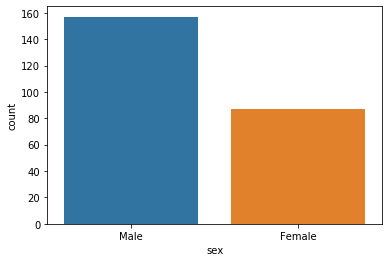

In [15]:
sns.countplot(x='sex', data=tips)

Now we look at box plots and violin plots. They are used to see the distribution of categorical data. Boxplots show all the quartiles of data and also show you what the outliers are. The distance from each line to the the next parallel one spans a new quartile of points and shows each quartile. You will use:
1. sns.boxplot(x,y,data=None,hue=None,...) => Draws a boxplot using the parameters. x is catgorical and y is not. The same deal stays with x,y and data. hue can be another categorical column and distinguishes itself in the box plots

A violin plot is similar but instead, shows a kde for each bin. 
1. sns.violinplot(x,y,data=None,hue=None,split=None...) => Draws a violinplot using the parameters. x is catgorical and y is not. The same deal stays with x,y and data. hue has seems deal as above. If your hue has two bins then split just combines the two violin plots by joining their sides

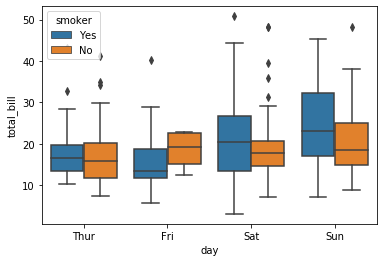

In [16]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

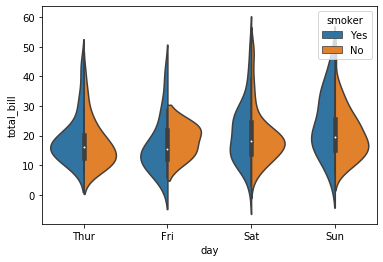

In [17]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', split="True")

Next comes stripplots. They are basically scatterplots based off each category. You use:
1. sns.stripplot(x,y,data=None,jitter=False, hue=None, dodge=None,...) => Creates a stripplot using the parameters. x,y, and data follow the same deal. If you set jitter to true then it will add noise to the x location of the points to make the density clearer. hue stays the same. if dodge is set to True it seperates each scatterplot into two based off the hue.

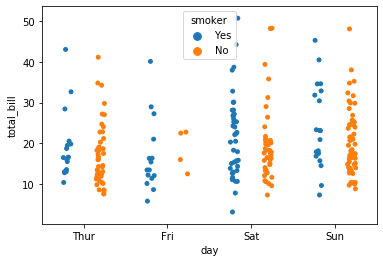

In [18]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue = 'smoker', dodge=True)

Next comes swarmplots. They try to combine the ideas of stripplots and violinplots. They do this by disallowing points to stack on putting them next to each other. They are not a good idea with larger datasets though. You use:
1. sns.swarmplot(x,y,data=None,hue=None,...) => Creates a stripplot using the parameters. x,y, and data follow the same deal hue follows the same deal.

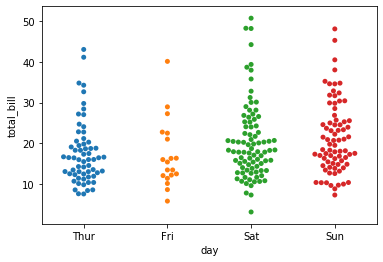

In [19]:
sns.swarmplot(x='day', y='total_bill', data=tips)

Finally we have catplot. They are basically a general way to use all of them. You use:
1. sns.catplot(x,y,data=None,kind=point,...) => Draws the specified plot using the data provided

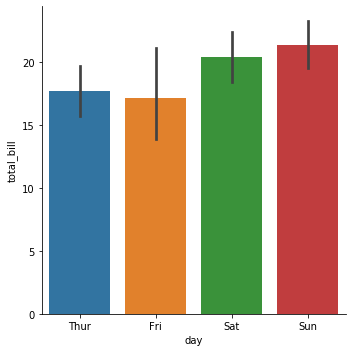

In [20]:
sns.catplot(x='day',y='total_bill',data=tips, kind='bar')

## Matrix Plots

Here we look at how to plot data in matrix form by using things like heatmaps and so on and we also learn how to get it in a usable format. 

In [21]:
flights = sns.load_dataset('flights')

In [22]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


First we need to get data into matrix form which is where the columns and rows are both variables that mean something. Since the rows are indexes they are not variables that are meaningful and therefore the dataframe above is not in matrix form. To get it into matrix form you can do many things. One thing is look at the correlation data which shows how much each variable corresponds to the others. You can also create pivot tables. We do the first thing first. We use:
1. (pandas dataframe).corr(...) => This creates a dataframe where each number shows how much the two variables correspond to each other.

In [23]:
corr = tips.corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


To then create a heatmap you use:
1. sns.heatmap(mfd, annot=False,linewidth=None,linecolor=None, standard_scale = None,... ) => Creates heatmap using data you pass in. If annot is set to True then it adds in the number value at the center of each box. linewidth can be specified to add that much width between each cell, and linecolor is the color of that gap. If standard_scale is set to 1, then all the values become percentages

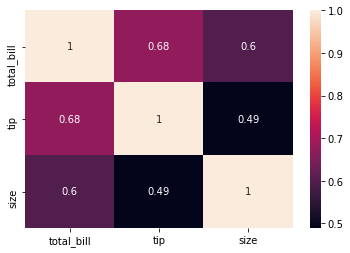

In [24]:
sns.heatmap(corr, annot=True)

Next we create a pivot table of flights and then use heatmap on that. 

In [25]:
pf = flights.pivot_table(index = 'month', columns='year',values='passengers')

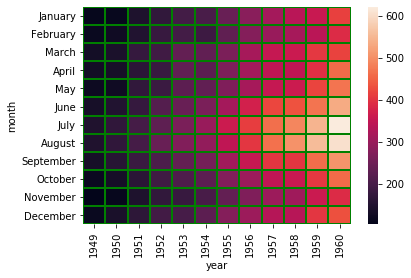

In [26]:
sns.heatmap(pf, linewidth=1,linecolor='green')

Now we talk about another matrix type plot which is called a cluster map. It is similar to heatmap but instead shuffles the indexes around to things that are similar and also shows that through tree branch looking things on the outside. You use:
1. sns.clustermap(mfd,...) => Creates cluster map using data

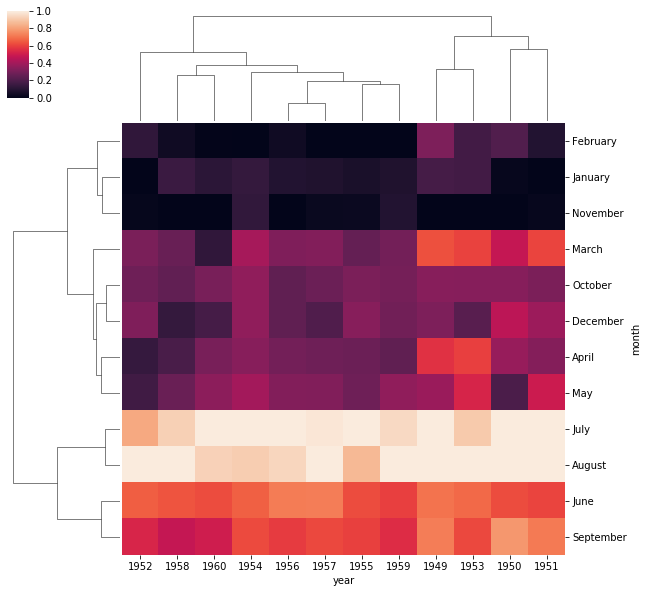

In [27]:
sns.clustermap(pf, standard_scale = 1)

## Grids

Creating grids in Seaborn is analogous to creating subplots in matplotlib. They give you a bit more control over your plots. First we use yet another new dataset

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


If we wanted to create a pairplot for iris but have control over what kind of plots we wanted to use we could use grids. First create a pairgrid object. Then you get to specify what plot type the diagonal, upper half, lower half and whole thing use using some more functions. Here is what you will use:
1. sns.PairGrid(df) => Given a dataframe it will return a pairgrid object.
2. (PairGrid).map(func) => Given plotting function it will apply that to the whole PairGrid
3. (PairGrid).map_upper(func) => Given plotting function it will apply that to the upper half of the PairGrid
4. (PairGrid).map_diag(func) => Given plotting function it will apply that to the diagonal of the PairGrid
5. (PairGrid).map_lower(func) => Given plotting function it will apply that to the lower hald of the PairGrid

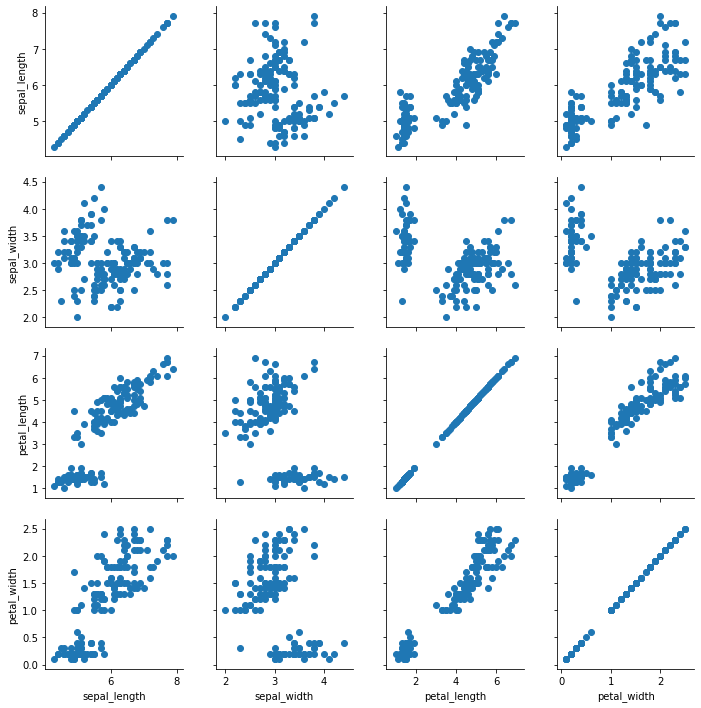

In [29]:
grid = sns.PairGrid(iris)
grid.map(plt.scatter)

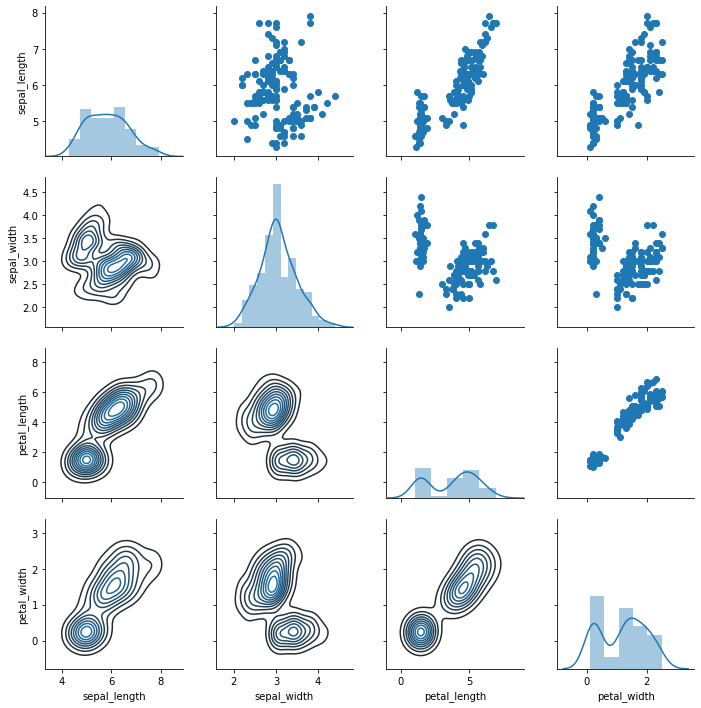

In [30]:
grid = sns.PairGrid(iris)
grid.map_upper(plt.scatter)
grid.map_diag(sns.distplot)
grid.map_lower(sns.kdeplot)

There is also facet grid where you can generate multiple plots for categorical data. First you specify the categorical data. Then you specify what kind of plot you will use and what data you are comparing. 
Here is what you will use to do all this:
1. sns.FacetGrid(data=tips) => Returns a FacetGrid object. 
2. (FacetGrid).map(func, *args ) => Populates FacetGrid using plotting function and data. In *args you pass in as much data as the plotting function requires 

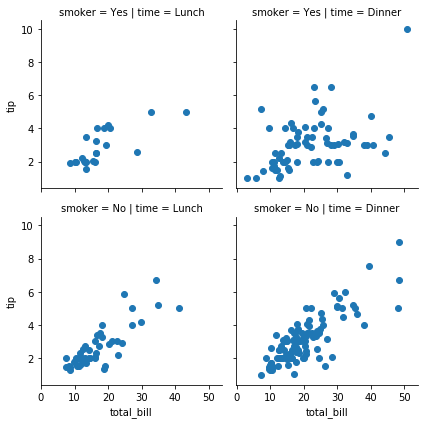

In [31]:
fc = sns.FacetGrid(data=tips, col='time',row='smoker')
fc.map(plt.scatter, 'total_bill', 'tip')

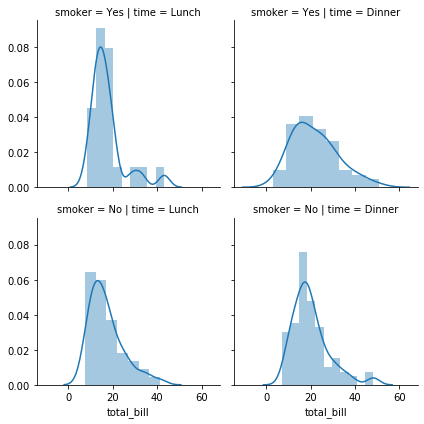

In [32]:
fc = sns.FacetGrid(data=tips, col='time',row='smoker')
fc.map(sns.distplot, 'total_bill')

## Regression Plots


These plots show the linear regression of data that you pass in. For now we will only look at one of them: 
1. sns.lmplot(x,y,data,hue,markers,row,col...) => Will create scatter plot with line of best fit using the parameters. x and y and data have the same deal as above. hue allows for categorical separation and colors and draws different lines of best fit for each category. lmplot also takes in matplotlib style parameters; for example you can pass in a list of all markers for the different hues as a list into markers. If row and col are used instead of hue, grids will be created and that is how the categorical data will be separated

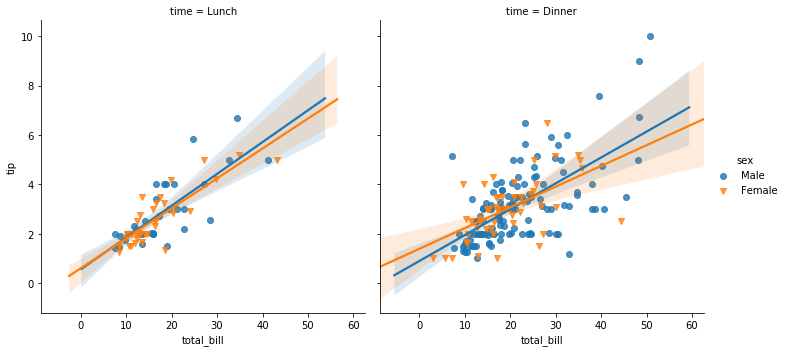

In [35]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue = 'sex', markers=['o','v'], col='time')